# About The Proyect
The purpose of this project is to explore the happiness indices in the different countries of the world, make a general analysis of the continents and draw deductions about countries that may be interesting under certain conditions. 

*tidyverse* was used as the main library.

Questions That Guide This Proyect
* What is the best city and the worst city to live in?
* In which content is the highest happiness index found?
* With the database obtained, is there any variable that is directly related to happiness?

## Libraries

In [33]:
library("tidyverse")

## Read and Prepare the Data

In [34]:
countries <- read_csv("/kaggle/input/best-country-to-live-in-2024/best-countries-to-live-in-2024.csv")

Rows: 141 Columns: 12
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): country, region, share_borders
dbl (8): population_2024, population_growthRate, land_area, population_densi...
lgl (1): unMember

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [35]:
# Tables that do not provide relevant information for this case were eliminated.
countries <- countries %>%
  select(-unMember, -population_densityMi)

# Column name change for better code management
countries <- countries %>%
  rename(
    pop_2024 = population_2024,
    pop_gr = population_growthRate,
    area = land_area,
    pop_density = population_density,
    hdi2021 = Hdi2021,
    hdi2020 = Hdi2020,
    w_happy2022 = WorldHappiness2022
    )


## Adding Columns

In [36]:
# We know the countries that are on each one's borders, to have that information 
# quantitatively we add a column with the numerical value.

countries <- countries %>% 
    mutate(num_borders = (nchar(share_borders) + 2) / 5) %>%
    relocate(num_borders, .after = "share_borders")

## Analyze

In [37]:
# If we want to travel, we look for the 5 countries with the highest happiness index

countries %>%
    select(country, w_happy2022, region) %>%
    arrange(desc(w_happy2022)) %>%
    top_n(5, wt = w_happy2022)

# Based on the same index, here are the following 5 countries to avoid

countries %>%
    select(country, w_happy2022, region) %>%
    arrange(w_happy2022) %>%
    top_n(-5, wt = w_happy2022)


country,w_happy2022,region
<chr>,<dbl>,<chr>
Finland,7.821,Europe
Denmark,7.636,Europe
Iceland,7.557,Europe
Switzerland,7.512,Europe
Netherlands,7.415,Europe


country,w_happy2022,region
<chr>,<dbl>,<chr>
Afghanistan,2.404,Asia
Lebanon,2.955,Asia
Zimbabwe,2.995,Africa
Rwanda,3.268,Africa
Botswana,3.471,Africa


* The country with the highest happiness index is Finland, the 4 subsequent countries are in Europe
* The country with the lowest index is Afghanistan, however, in the last few countries there are also African countries

In [38]:
# If we are someone who likes to travel, we will look for a continent
# with the best average to be able to move around.

countries %>%
    group_by(region) %>%
    summarise(happy_avrg = mean(w_happy2022),
              max_borders = max(num_borders, na.rm = TRUE),
              avrg_borders = mean(num_borders, na.rm = TRUE)) %>%
    arrange(desc(happy_avrg))

Warning message:
“There was 1 warning in `summarise()`.
ℹ In argument: `max_borders = max(num_borders, na.rm = TRUE)`.
ℹ In group 5: `region = "Oceania"`.
Caused by warning in `max()`:
! no non-missing arguments to max; returning -Inf”


region,happy_avrg,max_borders,avrg_borders
<chr>,<dbl>,<dbl>,<dbl>
Oceania,7.181000,-Inf,NaN
Europe,6.463600,14,4.526316
North America,6.288818,4,2.200000
South America,5.884111,10,4.444444
Asia,5.279179,15,4.085714
Africa,4.514400,8,4.540541


* Oceania is the continent with the highest average in terms of happiness, followed by Europe and North America, Europe has an average of neighboring countries of 4.52 and a maximum of 14, so Europe would be a better option to go if what you want We want to travel to different countries.

In [39]:
countries %>%
    filter(region == "Oceania") %>%
    select(country, share_borders)

country,share_borders
<chr>,<chr>
Australia,NA
New Zealand,NA


* Oceania only has two countries (considered in this study) and both do not border any other, so if we want to travel, we would be limited in terms of the number of countries to visit.

In [53]:
# Considering countries with an index greater than 7, Germany is the country with 
# the largest number of neighboring countries, but Finland does not have 
# the highest index, an option for this and Germany would be Austria and Switzerland.

countries %>%
    filter(region == "Europe" & w_happy2022 > 7.0) %>%
    select(country, num_borders, w_happy2022) %>%
    arrange(desc(num_borders))

country,num_borders,w_happy2022
<chr>,<dbl>,<dbl>
Germany,9,7.034
Austria,8,7.163
Switzerland,5,7.512
Finland,3,7.821
Norway,3,7.365
Luxembourg,3,7.404
Netherlands,2,7.415
Sweden,2,7.384
Denmark,1,7.636


We already know ideal countries if we want to travel and get to know countries, in addition to them having a high happiness index. However, based on this database, to what factor could we attribute the happiness indices? We can observe it by making a correlation matrix.

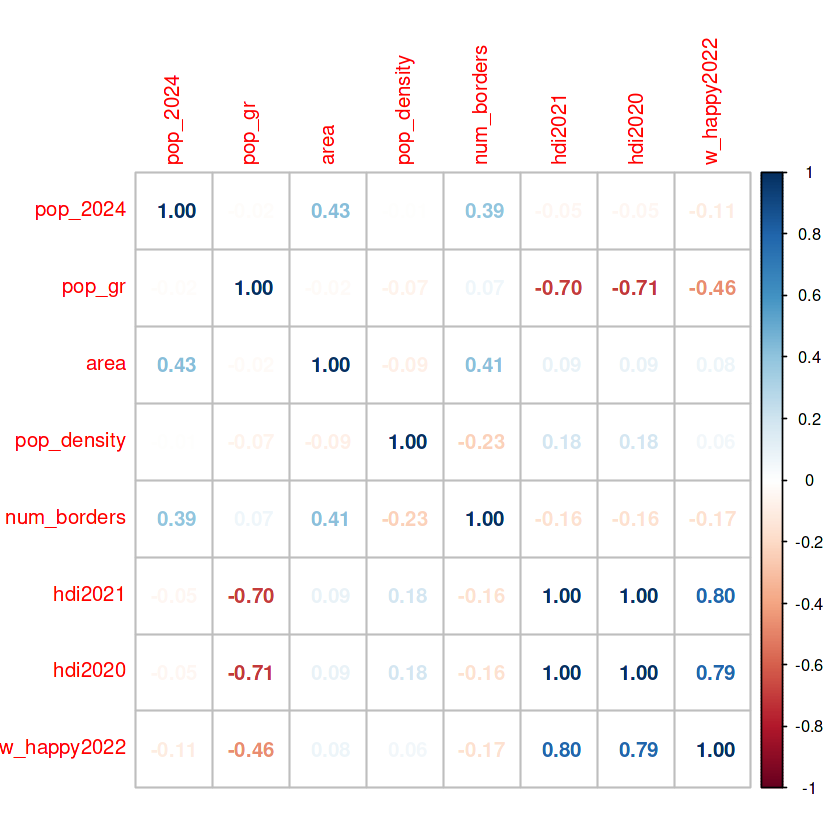

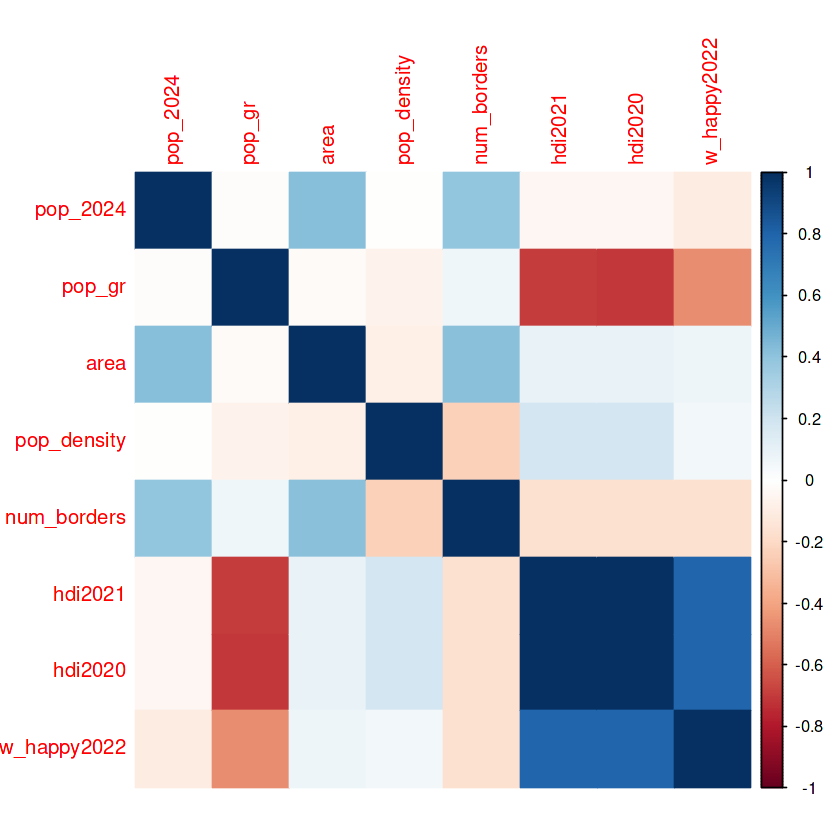

In [41]:
# We load the corplot library that will allow us to visualize the matrix 
library("corrplot")

# We filter variables to form a table with only numerical values
data <- countries %>%
    select(-country, -share_borders, -region)

# We eliminate null values and replace them with zeros
data <- data %>%
    mutate_if(is.numeric, ~replace_na(.,0))

# We make the correlation matrix
cor_data <- cor(data)

# We visualize the matrix with the coefficients and color gradients

corrplot(cor_data, method = "number")
corrplot(cor_data, method = "color")

The positive coefficients with higher values ​​are among the indicators of happiness, we can assume that in a period of 3 years these do not undergo a major change and that is why their strong relationship between them. Other relationships that we can observe are the growth rate with the happiness indicators, these, however, are negative.

Let's see their relationship in a scatter plot.

`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


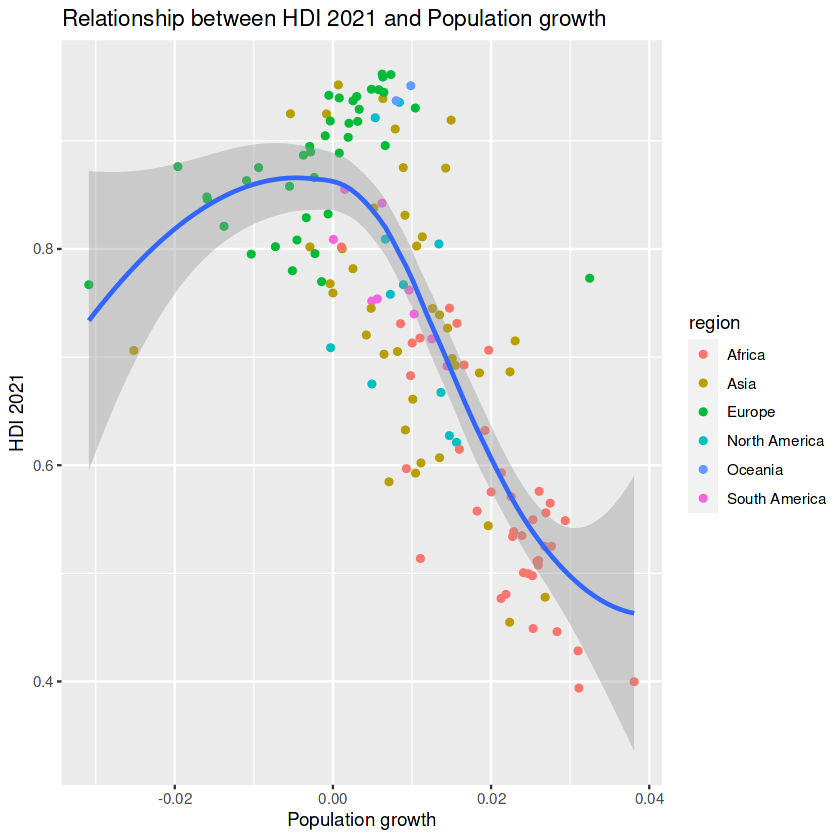

In [43]:
countries %>%
    ggplot(aes(x = pop_gr, y = hdi2021)) + 
    geom_jitter(aes(colour = region), na.rm = TRUE) + 
    geom_smooth() + 
    labs(title = "Relationship between HDI 2021 and Population growth",
        x = "Population growth",
        y = "HDI 2021")

## Conclusions

After this exploration of information we can now get a good idea of which country we can go to live in if what we want is to travel, based on neighboring countries as well as those that have a better happiness index.

Now we know that in Oceania we will surely have a good time and we will be able to have a great lifestyle but we will be limited in getting to know different countries.

Europe being the second with the best average, we have a much greater number of options of countries to visit and especially in the northeast area they continue to maintain a good lifestyle.

Austria and Switzerland are the ones that maintain an excellent balance between the happiness index as well as their surrounding countries.

Now if we did not have this information at hand regarding the happiness index, we saw that the characteristic that is best related is the growth of the population with a coefficient of -0.71, having the growth rate as data we could have an idea

Let´s to travel! (:
